# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_weather_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../python-api-homework/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities[:4])

601


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#used to test API call
#cities = ["Atlanta","New York"]

query_url = f"{url}appid={api_key}&units={units}&q="

new_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
wind_speed = []
max_temp = []

#print(query_url)

for city in cities:
    print(f"Retrieving Results for Index: {city}.")
    response = requests.get(query_url + city).json()
    try:

        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        new_city.append(city)
        print("Passed and found value")
    except (KeyError, IndexError):
         print("Missing field/result... skipping.")
    
# print(json.dumps(response, indent=4, sort_keys=True))
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")
#print(response['coord']['lat'])



Retrieving Results for Index: punta arenas.
Passed and found value
Retrieving Results for Index: rikitea.
Passed and found value
Retrieving Results for Index: georgetown.
Passed and found value
Retrieving Results for Index: jamestown.
Passed and found value
Retrieving Results for Index: khandbari.
Passed and found value
Retrieving Results for Index: khatanga.
Passed and found value
Retrieving Results for Index: bluff.
Passed and found value
Retrieving Results for Index: barentsburg.
Missing field/result... skipping.
Retrieving Results for Index: busselton.
Passed and found value
Retrieving Results for Index: carnarvon.
Passed and found value
Retrieving Results for Index: mehamn.
Passed and found value
Retrieving Results for Index: luena.
Passed and found value
Retrieving Results for Index: namatanai.
Passed and found value
Retrieving Results for Index: ushuaia.
Passed and found value
Retrieving Results for Index: taburi.
Missing field/result... skipping.
Retrieving Results for Index: s

In [74]:
# print(new_city,
# cloudiness,
# country,
# date,
# humidity,
# lat,
# lng,
# max_temp,
# wind_speed)

['Atlanta', 'Los Angeles', 'New York', 'Moscow'] [75, 1, 90, 75] ['US', 'US', 'US', 'RU'] [1570545780, 1570545645, 1570545357, 1570545739] [82, 77, 67, 55] [33.75, 34.05, 40.73, 55.75] [-84.39, -118.24, -73.99, 37.62] [75, 64, 62.6, 41] [4.7, 1.72, 10.29, 11.18]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:

#results = {[city]}
           #'date','humidity','lat','lng','max_temp','wind_speed']
results_df = pd.DataFrame({"City":new_city,"Cloudiness":cloudiness,"Country":country,"Date":date,
                           "Humidity":humidity,"Lat":lat,"Lng":lng,"Max Temp (F)":max_temp,"Wind Speed":wind_speed})
#results_df.head()


results_df.to_csv("../python-api-homework/Weather_API_Homework.csv")
results_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,punta arenas,40,CL,1570715877,74,-53.16,-70.91,37.40,31.09
1,rikitea,79,PF,1570715878,70,-23.12,-134.97,68.92,10.31
2,georgetown,75,GY,1570715878,79,6.80,-58.16,86.00,9.17
3,jamestown,7,AU,1570715878,51,-33.21,138.60,49.17,9.98
4,khandbari,61,NP,1570715878,94,27.38,87.21,49.19,1.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

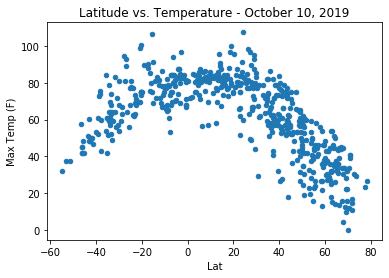

In [10]:
fig1= results_df.plot.scatter(x="Lat",y="Max Temp (F)")
plt.title("Latitude vs. Temperature - October 10, 2019")
# plt.xlabel("Lattitude")
# plt.ylabel("Temperature (F)")
plt.savefig("../python-api-homework/fig1.png")

#### Latitude vs. Humidity Plot

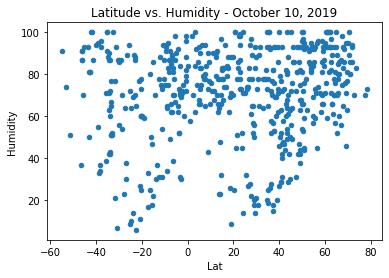

In [11]:
fig2 = results_df.plot.scatter(x="Lat",y="Humidity")
plt.title("Latitude vs. Humidity - October 10, 2019")
# plt.xlabel("Lattitude")
# plt.ylabel("Humidity")
plt.savefig("../python-api-homework/fig2.png")

#### Latitude vs. Cloudiness Plot

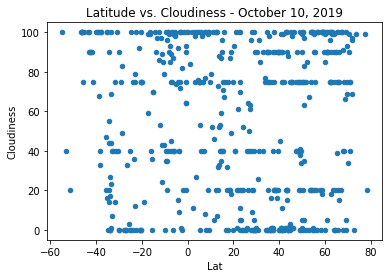

In [13]:
fig3 = results_df.plot.scatter(x="Lat",y="Cloudiness")
plt.title("Latitude vs. Cloudiness - October 10, 2019")
# plt.xlabel("Lattitude")
# plt.ylabel("Cloudiness")
plt.savefig("../python-api-homework/fig3.png")

#### Latitude vs. Wind Speed Plot

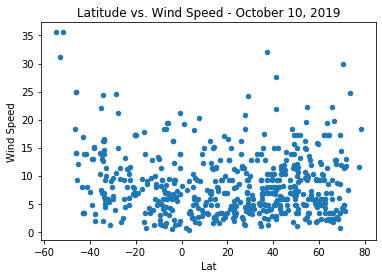

In [14]:
fig4 = results_df.plot.scatter(x="Lat",y= "Wind Speed")
plt.title("Latitude vs. Wind Speed - October 10, 2019")
# plt.xlabel("Lattitude")
# plt.ylabel("Wind Speed")
plt.savefig("../python-api-homework/fig4.png")

In [ ]:
#Observations 

#1.) There is a correlation between Temprerature and Lattitide.  As you are closed to "0" the tempreature is higher.
#2.) There are no places close to the equator with low humidity.
#3.) No apparent correlation between lattitude and clouidness and windspeed.